In [1]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# left-align tables in markdown
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

In [3]:
# import data
filePath = os.path.join('.','data','imdb.csv')
df = pd.read_csv(filePath)

# preview the data
df.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [4]:
# size and shape of data
print('Size: ', df.size, '\tShape: ', df.shape, '\n')

# check for null values
# tells you if a null value exists in each column
print('Null Values\n', df.isnull().any(),'\n\n')
# tells you how many null values exist in each column
print('Null/NaN Count\n', df.isnull().sum(),'\n\n')

# check data types
df.dtypes

Size:  10000 	Shape:  (1000, 10) 

Null Values
 Unnamed: 0     False
Title          False
Certificate     True
Duration       False
Genre          False
Rate           False
Metascore       True
Description    False
Cast           False
Info           False
dtype: bool 


Null/NaN Count
 Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
dtype: int64 




Unnamed: 0       int64
Title           object
Certificate     object
Duration        object
Genre           object
Rate           float64
Metascore      float64
Description     object
Cast            object
Info            object
dtype: object

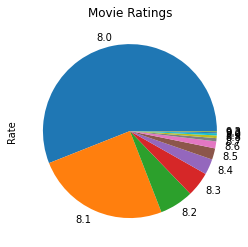

In [6]:
# pie chart using matplotlib
p_pie = df.groupby('Rate')['Rate'].count().plot.pie(
    # autopct = '%.2f%%'
)
p_pie.set_title('Movie Ratings')
plt.show()

## Let's make a better visual using the same data.

We'll start by grouping the ratings into letter grades, just like in school:

| Letter Grade | Score |
|---|---|
| A+ | 97–100% |
| A | 93–96% |
| A− | 90–92% |
| B+ | 87–89% |
| B | 83–86% |
| B− | 80–82% |
| C+ | 77–79% |
| C | 73–76% |
| C− | 70–72% |
| D+ | 67–69% |
| D | 63–66% |
| D− | 60–62% |
| F | 0–59% |

In [7]:
# We'll need to add a new "Grade" column to the dataframe.
# Let's use numpy to create a nested conditional statement and assign a Letter Grade to each movie in the dataframe:
df['Grade'] = \
    np.where(df['Rate'] < 6,   'F',
    np.where(df['Rate'] < 6.3, 'D-',
    np.where(df['Rate'] < 6.7, 'D',
    np.where(df['Rate'] < 7,   'D+',
    np.where(df['Rate'] < 7.3, 'C-',
    np.where(df['Rate'] < 7.7, 'C',
    np.where(df['Rate'] < 8,   'C+',
    np.where(df['Rate'] < 8.3, 'B-',
    np.where(df['Rate'] < 8.7, 'B',
    np.where(df['Rate'] < 9.0, 'B+',
    np.where(df['Rate'] < 9.3, 'A-',
    np.where(df['Rate'] < 9.7, 'A', 
    'A+'))))))))))))

# Let's check to make sure our new "Grade" column is in the dataframe.
# This time, we'll preview the first 5 rows and only show the Title, Rate, and Grade columns:
df.loc[:,['Title', 'Rate', 'Grade']].head()

,Title,Rate,Grade
0,1. The Shawshank Redemption (1994),9.3,A
1,2. The Godfather (1972),9.2,A-
2,3. The Dark Knight (2008),9.0,A-
3,4. The Godfather: Part II (1974),9.0,A-
4,5. The Lord of the Rings: The Return of the Ki...,8.9,B+


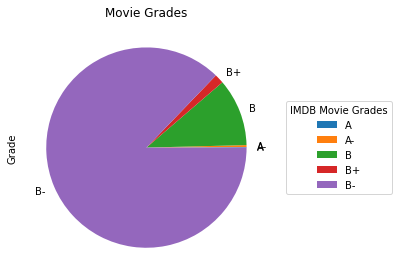

In [29]:
# Great, our new "Grade" column is now part of the dataframe.
# Let's see how our pie chart looks when we use the "Grade" column instead of the "Rate" column

#x = np.char.array(['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])
#y = df['Rate']
#pct = 100.*y/y.sum()

#p_pie = df.groupby('Grade')['Grade'].count().plot.pie(
#    autopct = '%.2f%%', 
#    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, pct)], 
#    figsize = (12, 12)
#)

p_pie = df.groupby('Grade')['Grade'].count().plot.pie(
    labels = )

p_pie.legend(title = 'IMDB Movie Grades',
             loc = 'center right', 
             bbox_to_anchor = (1,0,0.5,1))
p_pie.set_title('Movie Grades')
plt.tight_layout()
plt.show()

## Wow, that's much better! 

The technical term for what we've just done here is "binning," like "putting things into bins."
Binning is useful for creating groups of rows with similar (but not identical) values.

## Questions

- Can you think of any examples where you've seen binning used in a chart or graph in the real world?
- If so, do you think it helped make the data easier to understand?

In [ ]:
"""


"""